   **REGRESSION LINEAIRE**

*I. Regression linéaire avec le modèle LinearRegression de scikitlearn*

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**1. Let's start by data. import random data to get our dataset (x,y)**

We start by the set X. We take 50 normalised random values and reshape it into a vector of m element X(m,1)

In [58]:
np.random.seed(0)
m = 100
X = np.random.randn(m)
print(X.shape)


(100,)


In [59]:
X = X.reshape(-1,1)
print(X.shape)


(100, 1)


We take the second set y which correspond to X values

In [60]:
y = 1.5*X + 3
y.shape

(100, 1)

In [61]:
y = y + np.random.randn(m).reshape(-1,1)
y.shape

(100, 1)

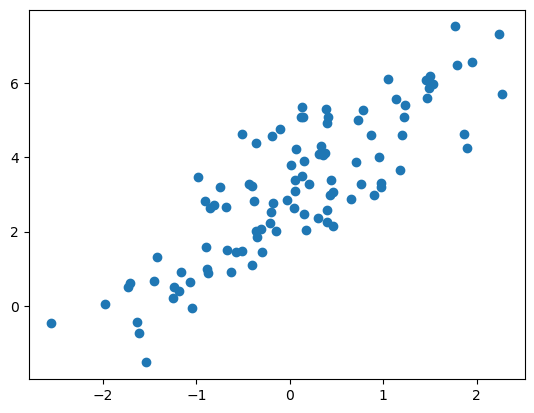

In [62]:
plt.scatter(X,y)
plt.show()

**2. Use the scikitlearn model to train it on data and make predictions**

In [71]:
model = LinearRegression()
model.fit(X,y)

new_data = np.linspace(-3,3,100).reshape(-1,1)
new_data.shape

(100, 1)

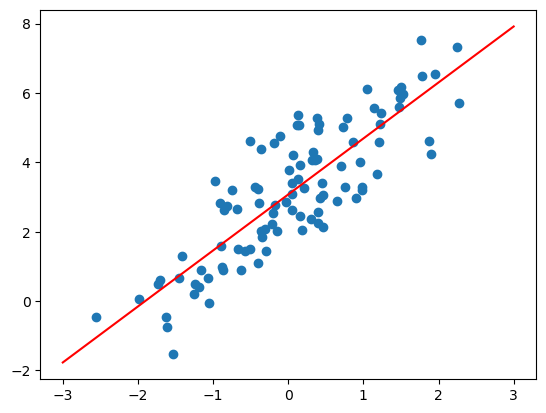

In [72]:
predictions = model.predict(new_data)
plt.scatter(X,y)
plt.plot(new_data, predictions, c ='r' )
plt.show()

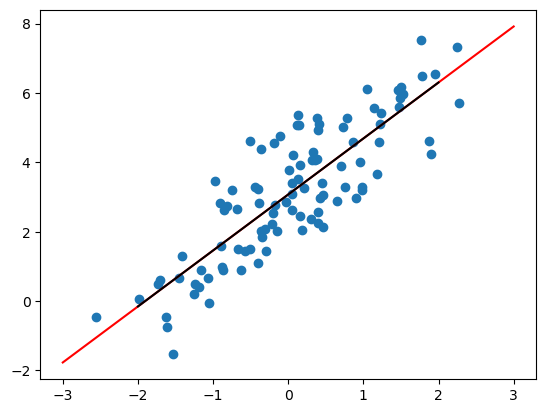

In [76]:
new_data1 = np.linspace(-3,3,100).reshape(-1,1)
predictions1 = model.predict(new_data1)

new_data2 = np.linspace(-2,2).reshape(-1,1)
predictions2 = model.predict(new_data2)

plt.scatter(X,y)
plt.plot(new_data1, predictions1, c ='r' )
plt.plot(new_data2, predictions2, c ='k' )
plt.show()

*II. Utilisation de la méthode de la descente de gradient pour le même set de données*

In [122]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import make_regression

**1. Let's start by data. import random data to get our dataset (x,y)**

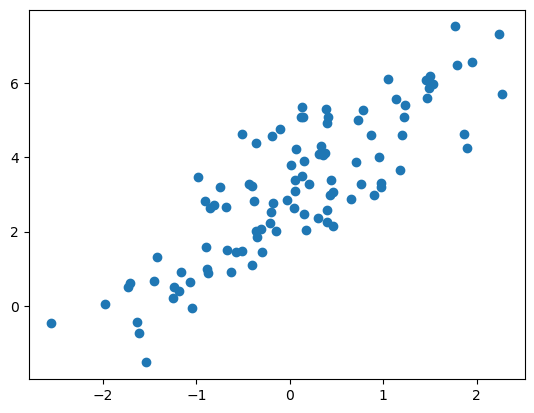

In [123]:
np.random.seed(0)

m = 100
x = np.random.randn(m).reshape(-1,1)
y = 1.5*x + 3 + np.random.randn(m).reshape(-1,1)

plt.scatter(x,y)
plt.show()

In [124]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


**2. Construisons le modèle à partir des paramètres X et theta**

In [288]:
X = np.hstack((x, np.ones(x.shape)))
theta = np.random.randn(2,1)

print(theta)
print(theta.shape)
X.shape

[[ 2.25930895]
 [-0.04225715]]
(2, 1)


(100, 2)

In [289]:
def model(X,theta):
    return X.dot(theta)

In [290]:
model(X,theta).shape

(100, 1)

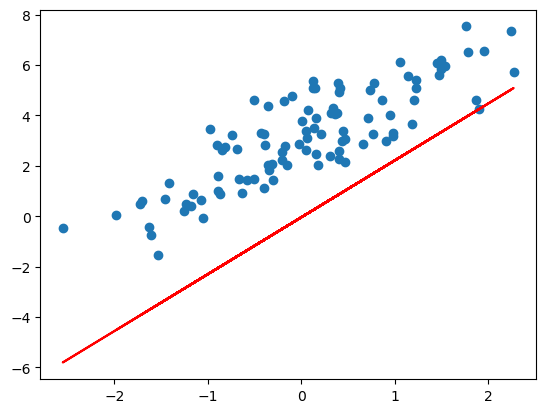

In [291]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')
plt.show()

**3. Calculons la fonction coût**

In [302]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*sum((y - model(X,theta))**2)

In [303]:
cost_function(X,y,theta)

array([5.47931677])

**4. Utilisation de la méthode de la descente de gradient pour déterminer les paramètres theta**

In [304]:
def grad(X,y,theta):
    return 1/m*X.T.dot(model(X,theta)-y)

In [305]:
def grad_desc(X,y,theta, learn_rate, n_it):
    cost_hist = np.zeros(n_it)
    for i in range(0, n_it):
        theta = theta - learn_rate*grad(X,y,theta)
        cost_hist[i] = cost_function(X,y,theta)
    return theta, cost_hist

In [306]:
theta_f, cost_hist = grad_desc(X,y,theta, learn_rate = 0.01, n_it = 500)
theta_f

array([[1.62470416],
       [3.05252319]])

**5. Donnons le resultat du modèle et calculons la nouvelle fonction coût**

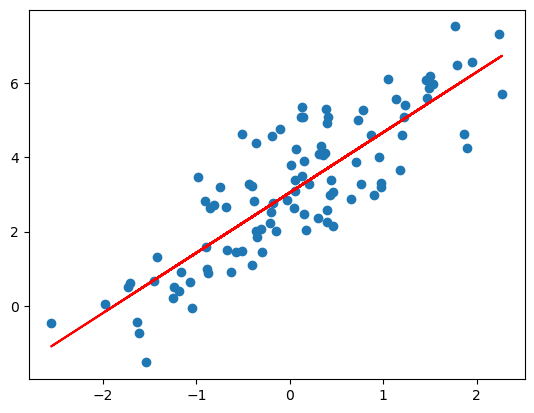

In [307]:
prediction = model(X, theta_f)

plt.scatter(x,y)
plt.plot(x, prediction, c='r')
plt.show()

In [308]:
cost_function = 1/(2*m)*sum((y - model(X,theta_f))**2)
cost_function

array([0.52887947])

**6. La courbe de la fonction coût nous permet de déterminer le nombre d'itération au bout duquel on atteint le minimum de la fonction coût**

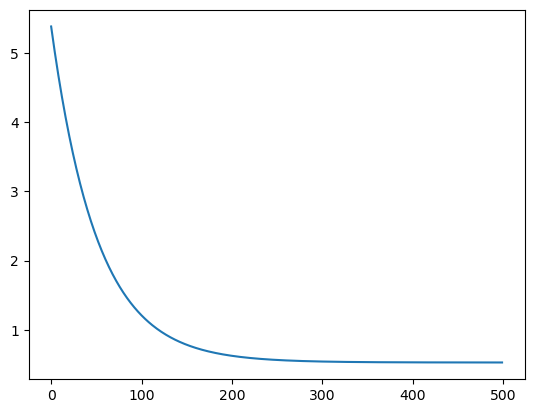

In [309]:
plt.plot(range(len(cost_hist)), cost_hist)

In [310]:
def coef_determination(y, pred):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [311]:
coef_determination(y, prediction)

0.7145579266331769